In [2]:
import pandas as pd
import altair as alt
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
maf = pd.read_csv('final_maf.maf',sep='\t')

In [4]:
maf['ANNOTATION'].unique()

array(['LIKELY_ONCOGENIC', 'ONCOGENIC', 'VUS', 'BENIGN'], dtype=object)

In [5]:
maf = maf[maf['ANNOTATION'].isin(['LIKELY_ONCOGENIC','ONCOGENIC'])]
maf['mut_id'] = maf['Hugo_Symbol'] + ':' + maf['HGVSc'] + ':' + maf['HGVSp_Short']
maf = maf[['mut_id','sample','Hugo_Symbol','Chromosome','Start_Position','End_Position','Variant_Classification','Variant_Type',
     'Reference_Allele','Tumor_Seq_Allele2','Consequence','ANNOTATION','t_vaf']]
maf.rename(columns={'Hugo_Symbol':'Gene','Tumor_Seq_Allele2':'Alt_Allele'},inplace=True)
maf['Composite_Mutation'] = 'False'

In [6]:
maf

mut_id                     sample    Gene  \
0                ALK:c.3599C>T:p.A1200V  CPM00000165-BM-D_20200406     ALK   
1                BRAF:c.1799T>A:p.V600E   CPM00000331-F-D_20190826    BRAF   
2                   NRAS:c.37G>C:p.G13R  CPM00000346-BM-D_20170801    NRAS   
3                NF1:c.5902C>T:p.R1968*  CPM00000366-BM-D_20191202     NF1   
4                CDKN2A:c.207G>C:p.E69D   CPM00000379-P-D_20200204  CDKN2A   
...                                 ...                        ...     ...   
1361            PIK3CA:c.323G>A:p.R108H   CPM00018670-F-D_20210401  PIK3CA   
1362              TPMT:c.719A>G:p.Y240C  CPM00018693-BM-D_20210401    TPMT   
1363              TPMT:c.460G>A:p.A154T  CPM00018693-BM-D_20210401    TPMT   
1364             ALK:c.3824G>A:p.R1275Q   CPM00018704-P-D_20210407     ALK   
1365  SUZ12:c.1150_1151del:p.L385Pfs*10   CPM00018706-F-D_20210407   SUZ12   

     Chromosome  Start_Position  End_Position Variant_Classification  \
0             2        29443618      29443618      Missense_Mutation   
1             7       140453136     140453136      Missense_Mutation   
2             1       115258745     115258745      Missense_Mutation   
3            17        29661945      29661945      Nonsense_Mutation   
4             9        21971151      21971151      Missense_Mutation   
...         ...             ...           ...                    ...   
1361          3       178916936     178916936      Missense_Mutation   
1362          6        18130918      18130918      Missense_Mutation   
1363          6        18139228      18139228      Missense_Mutation   
1364          2        29432664      29432664      Missense_Mutation   
1365         17        30315461      30315462        Frame_Shift_Del   

     Variant_Type Reference_Allele Alt_Allele         Consequence  \
0             SNP                G          A    missense_variant   
1             SNP                A          T    missense_variant   
2             SNP                C          G    missense_variant   
3             SNP                C          T         stop_gained   
4             SNP                C          G    missense_variant   
...           ...              ...        ...                 ...   
1361          SNP                G          A    missense_variant   
1362          SNP                T          C    missense_variant   
1363          SNP                C          T    missense_variant   
1364          SNP                C          T    missense_variant   
1365          DEL               AG          -  frameshift_variant   

            ANNOTATION     t_vaf Composite_Mutation  
0     LIKELY_ONCOGENIC  0.455008              False  
1            ONCOGENIC  0.058438              False  
2            ONCOGENIC  0.054152              False  
3            ONCOGENIC  0.811938              False  
4     LIKELY_ONCOGENIC  0.155660              False  
...                ...       ...                ...  
1361         ONCOGENIC  0.369715              False  
1362         ONCOGENIC  0.508310              False  
1363         ONCOGENIC  0.487039              False  
1364         ONCOGENIC  0.019739              False  
1365         ONCOGENIC  0.687500              False  

[1212 rows x 14 columns]

In [7]:
maf['sample'].unique()

array(['CPM00000165-BM-D_20200406', 'CPM00000331-F-D_20190826',
       'CPM00000346-BM-D_20170801', 'CPM00000366-BM-D_20191202',
       'CPM00000379-P-D_20200204', 'CPM00000411-F-D_20181016',
       'CPM00000720-BM-D_20210119', 'CPM00000979-P-D_20210503',
       'CPM00002066-F-D_20170822', 'CPM00002066-F-D_20190422',
       'CPM00003187-F-D_20180816', 'CPM00003275-P-D_20201026',
       'CPM00003311-F-D_20200106', 'CPM00003690-BM-D_20201203',
       'CPM00003778-P-D_20180516', 'CPM00003785-F-D_20200617',
       'CPM00003806-F-D_20181210', 'CPM00004342-BM-D_20170824',
       'CPM00004371-F-D_20180814', 'CPM00004371-F-D_20181030',
       'CPM00004371-P-D_20180831', 'CPM00004560-F-D_20170908',
       'CPM00004637-P-D_20170921', 'CPM00004699-F-D_20170630',
       'CPM00004711-P-D_20190204', 'CPM00004751-F-D_20170630',
       'CPM00004778-F-D_20170711', 'CPM00004792-F-D_20170711',
       'CPM00004820-F-D_20170718', 'CPM00004824-F-D_20170718',
       'CPM00004824-F-D_20170809', 'CPM00004851-P

In [8]:
samples = maf['sample'].unique()
genes = maf['Gene'].unique()

In [9]:
composite_mutation_dict = {} 

In [10]:
for sample in samples:
    composite_mutation_dict[sample] = {}
    for gene in genes:
        mut_maf = maf[(maf['sample'] == sample) & (maf['Gene'] == gene)]
        mut_maf.reset_index(inplace=True)
        length = len(mut_maf)
        
        if(length>1):
            composite_mutation_dict[sample][gene] = 1
            for i in range(0,len(mut_maf)):
                maf.loc[(maf['mut_id'] == mut_maf['mut_id'][i]) & (maf['sample']==sample),'Composite_Mutation']='True'
        else:
            composite_mutation_dict[sample][gene] = 0
        

In [11]:
composite_maf = maf[maf['Composite_Mutation']=='True']

In [12]:
composite_mutations = pd.DataFrame(composite_mutation_dict)
nonzero_columns=(composite_mutations!=0).any().tolist()
composite_mutations = composite_mutations.loc[:,nonzero_columns]
composite_mutations['sum'] = composite_mutations.sum(axis=1)
totals = composite_mutations['sum']

In [13]:
composite_genes = list(totals[totals>=1].index)

In [14]:
gene_counts = pd.DataFrame(totals[totals>=1]).reset_index()
gene_counts.rename(columns={'index':'Gene','sum':'Count'},inplace=True)

In [15]:
alt.Chart(gene_counts).mark_bar().encode(
    x='Gene',
    y='Count',
    ).properties(title='Composite Mutations by Gene')

alt.Chart(...)

In [16]:
composite_samples = composite_maf['sample'].unique()

In [17]:
composite_maf.reset_index(inplace=True)
composite_maf.drop(columns='index',inplace=True)

### Incorporating ASCAT CN data

In [18]:
with open('all_cna_samples.txt') as f:
    all_cna_samples = f.read().splitlines()

In [19]:
short_composite_samples = list(map(lambda x:x.split('.')[0].split('-')[0],composite_samples))

In [20]:
#composite samples that have matching copy number data
final_composite_samples = list(set(short_composite_samples) & set(all_cna_samples))

In [21]:
oncoscan_CN = pd.read_csv('oncoscan_CN.txt',sep='\t',header=None)
cytoscan_CN = pd.read_csv('cytoscan_CN.txt',sep='\t',header=None)

oncoscan_CN.rename(columns={0:'full_name'},inplace=True) 
cytoscan_CN.rename(columns={0:'full_name'},inplace=True) 

oncoscan_CN['short_name'] = oncoscan_CN['full_name'].apply(lambda x:x.split('.')[0])
cytoscan_CN['short_name'] = cytoscan_CN['full_name'].apply(lambda x:x.split('-')[0])

In [22]:
cn_files = pd.concat([oncoscan_CN,cytoscan_CN])

In [23]:
composite_maf['short_sample'] = composite_maf['sample'].apply(lambda x: x.split('.')[0].split('-')[0])

In [24]:
reduced_composite_maf = composite_maf[composite_maf['short_sample'].isin(final_composite_samples)]

In [25]:
reduced_composite_maf.reset_index(inplace=True)
reduced_composite_maf.drop('index',axis=1,inplace=True)

In [26]:
reduced_composite_maf['Copy_Number'] = 0
for i in range(0,len(reduced_composite_maf)):
    sample = reduced_composite_maf['short_sample'][i]
    cna_file = cn_files[cn_files['short_name'] == sample].dropna().reset_index()['full_name'][0]
    cna_calls = pd.read_csv('../venkatas_outputs/cna_calls/'+cna_file,sep='\t')
    
    pos = reduced_composite_maf['Start_Position'][i]
    chrom = reduced_composite_maf['Chromosome'][i]
    for j in range(0,len(cna_calls)):
        start = cna_calls['segStart'][j]
        end = cna_calls['segEnd'][j]
        if(str(cna_calls['CHR'][j])==chrom):
            if(pos>=start and pos<=end):
                reduced_composite_maf.loc[:,'Copy_Number'].iloc[i] = cna_calls['CN'][j]

In [27]:
final_comp_muts = list(reduced_composite_maf['mut_id'].unique())

### Curated Copy Number Data Integration

In [28]:
pancan_data = pd.read_csv('pancan.all_data_by_genes.txt',sep='\t')
copath_mapping = pd.read_csv('all_copath_bathc_convert_merged.txt',sep='\t')
copath_mapping = pd.Series(copath_mapping.CPM_UID.values,index=copath_mapping.CoPATH).to_dict()
pancan_data.rename(columns = copath_mapping,inplace=True)

In [29]:
pancan_data['Gene Symbol'] = pancan_data['Gene Symbol'].apply(lambda x:x.split('|')[0])

In [30]:
curated_samples = list(pancan_data.columns)
curated_samples = [i for i in curated_samples if 'CPM' in i]

In [31]:
curated_composite_maf = composite_maf[composite_maf['short_sample'].isin(curated_samples)]

curated_composite_maf.reset_index(inplace=True)
curated_composite_maf.drop('index',axis=1,inplace=True)

In [32]:
curated_composite_maf['Copy_Number_Status'] = 'Unknown'
curated_composite_maf['CN_values'] = 'NA'

for i in range(0,len(curated_composite_maf)):
    sample = curated_composite_maf['short_sample'][i]
    gene = curated_composite_maf['Gene'][i]
    
    sample_specific_len = len(pancan_data[pancan_data['Gene Symbol'] == gene][sample])
    if(sample_specific_len < 1):
        continue
    else:
        cn_value =  pancan_data[pancan_data['Gene Symbol'] == gene][sample].reset_index().iloc[:,1][0]
        curated_composite_maf['CN_values'][i] = cn_value
        if(cn_value > 0.2):
            curated_composite_maf['Copy_Number_Status'][i] = 'Gain'
        if(cn_value < -0.2 ):
            curated_composite_maf['Copy_Number_Status'][i] = 'Deletion'
        if((cn_value >= -0.2) & (cn_value <= 0.2)):
            curated_composite_maf['Copy_Number_Status'][i] = 'Neutral'

In [33]:
curated_composite_maf['Copy_Number_Status'].value_counts()

Neutral     179
Gain         22
Deletion     14
Unknown       6
Name: Copy_Number_Status, dtype: int64

In [34]:
curated_mutations = list(curated_composite_maf['mut_id'].unique())

### Making Original MAF with Copy Number Info

In [35]:
maf['short_name'] = maf['sample'].apply(lambda x: x.split('.')[0].split('-')[0])

In [36]:
maf.reset_index(inplace=True)
maf.drop('index',axis=1,inplace=True)

In [37]:
maf['Copy_Number_Status'] = 'Unknown'
maf['CN_Value'] = 'NA'

for i in range(0,len(maf)):
    sample = maf['short_name'][i]
    gene = maf['Gene'][i]
    
    if(sample in curated_samples):
        sample_specific_len = len(pancan_data[pancan_data['Gene Symbol'] == gene][sample])
    else:
        continue
    if(sample_specific_len < 1):
        continue
    else:
        cn_value =  pancan_data[pancan_data['Gene Symbol'] == gene][sample].reset_index().iloc[:,1][0]
        maf['CN_Value'][i] = cn_value
        if(cn_value > 0.2):
            maf['Copy_Number_Status'][i] = 'Gain'
        if(cn_value < -0.2 ):
            maf['Copy_Number_Status'][i] = 'Deletion'
        if((cn_value >= -0.2) & (cn_value <= 0.2)):
            maf['Copy_Number_Status'][i] = 'Neutral'

In [38]:
maf['Mut_Subgroup'] = 'Undefined'
for i in range(0,len(maf)):
    if(maf['Copy_Number_Status'][i]=='Deletion'):
        maf['Mut_Subgroup'][i] = 'Mut + Del'
    else:
        if(maf['Composite_Mutation'][i] == 'True'):
            maf['Mut_Subgroup'][i] = '>1mut'
        else:
            maf['Mut_Subgroup'][i] = '1mut'
    

In [39]:
maf['Copy_Number_Status'].value_counts()

Neutral     595
Unknown     457
Deletion     86
Gain         74
Name: Copy_Number_Status, dtype: int64

### Genomic Instability Data

In [40]:
seg_file = pd.read_csv('oncoscan_chas_pancan.seg',sep='\t')

In [41]:
seg_file = seg_file[~seg_file['Chromosome'].isin([23,24])].reset_index()
seg_file.drop('index',axis=1,inplace=True)

In [42]:
for i in range(0,len(seg_file)):
    sample = seg_file['Sample'][i]
    if(sample in list(copath_mapping.keys())):
        seg_file['Sample'][i] = copath_mapping[sample]

In [43]:
seg_samples = list(seg_file['Sample'].unique())
seg_samples = [i for i in seg_samples if 'CPM' in i]

In [44]:
seg_file = seg_file[seg_file['Sample'].isin(seg_samples)]

In [45]:
seg_file.reset_index(inplace=True)
seg_file.drop('index',axis=1,inplace=True)

In [46]:
seg_file['CN_Status'] = 'NA'

In [47]:
for i in range(0,len(seg_file)):
    cn_value = seg_file['Seg.CN'][i]
    if(cn_value > 0.2):
        seg_file['CN_Status'][i] = 'Gain'
    if(cn_value < -0.2 ):
        seg_file['CN_Status'][i] = 'Deletion'
    if((cn_value >= -0.2) & (cn_value <= 0.2)):
        seg_file['CN_Status'][i] = 'Neutral'

In [48]:
genomic_instability_scores = {}

In [49]:
for sample in list(seg_file['Sample'].unique()):
    df = seg_file[seg_file['Sample']==sample]
    total_length = 0
    altered_length = 0
    for chrom in list(df['Chromosome'].unique()):
        sub_df = df[df['Chromosome'] == chrom]
        sub_df.drop_duplicates(subset=['Start Position','End Position'],inplace=True)
        total_length = total_length + sub_df.reset_index()['End Position'][len(sub_df)-1]
        
        sub_alt_df = sub_df[(sub_df['CN_Status'] == 'Gain') | (sub_df['CN_Status'] == 'Deletion')]
        if(len(sub_alt_df) > 0):
            for i in range(0,len(sub_alt_df)):
                start = sub_alt_df.reset_index()['Start Position'][i]
                end = sub_alt_df.reset_index()['End Position'][i]
                altered_length = altered_length + (end - start)
    score = altered_length/total_length
    genomic_instability_scores[sample] = score

In [181]:
unstable_samples = [k for k,v in genomic_instability_scores.items() if v >= 0.8]

In [182]:
maf[maf.short_name.isin(unstable_samples)]['Gene'].value_counts()

TP53      7
NRAS      3
KRAS      2
DICER1    2
MET       1
MYOD1     1
ALK       1
GNA11     1
IDH1      1
KMT2D     1
RET       1
NT5C2     1
NF1       1
Name: Gene, dtype: int64

In [50]:
test = pd.DataFrame(genomic_instability_scores,index=['Score']).transpose()

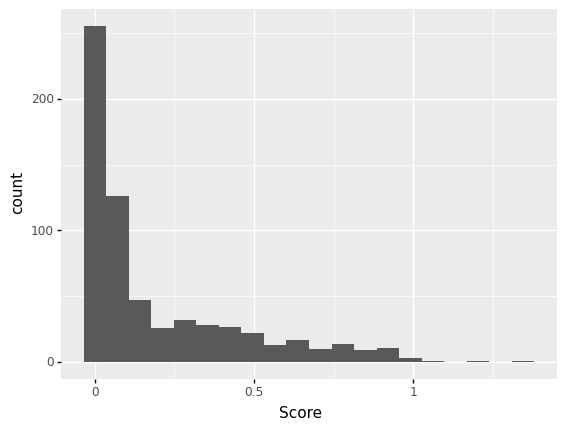

<ggplot: (8757728533188)>

In [51]:
ggplot(test) + aes(x='Score')+geom_histogram()

In [50]:
trouble_pairs = dict((k, v) for k, v in genomic_instability_scores.items() if v > 1)
trouble_keys = list(trouble_pairs.keys())

In [51]:
trouble_pairs

{'CPM00005626': 1.093211527025724,
 'CPM00005564': 1.3443347186652392,
 'CPM00005715': 1.019516419776623,
 'CPM00008371': 1.174987021999995}

## Visualization/Analysis of Data

In [130]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import matplotlib.font_manager as fm

from mizani.formatters import percent_format

In [131]:
title_fpath = 'fonts/PTSans-Bold.ttf'
body_fpath = 'fonts/PTSans-Regular.ttf'

title_text = fm.FontProperties(fname=title_fpath)
body_text =  fm.FontProperties(fname=body_fpath)

#### Composite Mutations by Gene

In [132]:
maf.drop_duplicates(subset=['mut_id','short_name'],inplace=True)

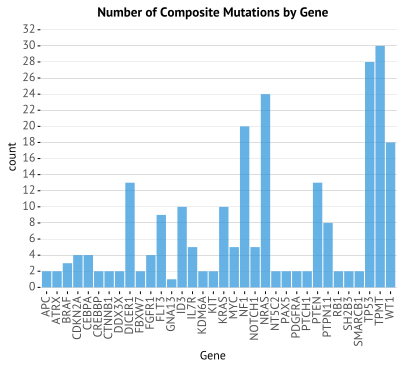

<ggplot: (8757709285593)>

In [135]:
num_comp_plot = ggplot(maf[maf['Composite_Mutation']=='True']) + aes(x='Gene') + geom_bar(fill='#2591d9',alpha=0.7) \
+ theme(axis_text_x = element_text(angle = 90)) + \
scale_y_continuous(limits=(0,32),expand = (0, 0.5),breaks = range(0, 42,2)) + \
ggtitle('Number of Composite Mutations by Gene') + \
theme(panel_background = element_rect(fill = 'white'),panel_grid_major_y = element_line( size=.1, color="black" ),
     plot_title=element_text(fontproperties=title_text),text=element_text(fontproperties=body_text)) 

num_comp_plot

#### TP53 Specific Analysis

In [136]:
viz = pd.DataFrame(maf[maf['Gene']=='TP53']['Mut_Subgroup'].value_counts())
total = viz['Mut_Subgroup'].sum()
viz['Percentage of TP53 Subgroup'] = viz['Mut_Subgroup'].apply(lambda x:(x/total)*100)
viz.reset_index(inplace=True)

In [137]:
cbbPalette = ("#186294", "#d19226", "#2ba18b")
cbbPalette2 = ('#d9c404', '#2384ad', "#53387d")

tp53 = ggplot(viz) + aes(x='index',y='Percentage of TP53 Subgroup',fill='index') + geom_col() +coord_flip() + \
scale_fill_manual(values=cbbPalette) + ggtitle('Percentage of TP53 Mutations by Subgroup') + \
theme(panel_background = element_rect(fill = 'white'),panel_grid_major_x = element_line( size=.1, color="black" ),
     plot_title=element_text(fontproperties=title_text),text=element_text(fontproperties=body_text),
     legend_position = 'none') + \
labs(x='TP53 Subgroup',y='Percentage of TP53 Mutations')

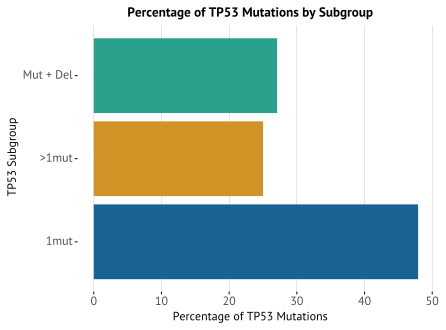

<ggplot: (8757709126578)>

In [138]:
tp53

In [139]:
maf[maf['Gene']=='TP53']

mut_id                     sample  Gene Chromosome  \
34         TP53:c.587G>A:p.R196Q   CPM00004371-F-D_20181030  TP53         17   
38         TP53:c.733G>A:p.G245S   CPM00004637-P-D_20170921  TP53         17   
63         TP53:c.558T>A:p.D186E  CPM00004947-BM-D_20170822  TP53         17   
75         TP53:c.558T>A:p.D186E  CPM00005015-BM-D_20170822  TP53         17   
81     TP53:c.280del:p.S94Hfs*29   CPM00005081-P-D_20170906  TP53         17   
...                          ...                        ...   ...        ...   
1094       TP53:c.524G>A:p.R175H   CPM00006662-P-D_20180622  TP53         17   
1108       TP53:c.596G>T:p.G199V  CPM00007272-BM-D_20181030  TP53         17   
1116       TP53:c.455C>G:p.P152R   CPM00007428-F-D_20181115  TP53         17   
1124  TP53:c.574del:p.Q192Sfs*55   CPM00008216-P-D_20190416  TP53         17   
1200       TP53:c.758C>T:p.T253I   CPM00018209-F-D_20210225  TP53         17   

      Start_Position  End_Position Variant_Classification Variant_Type  \
34           7578262       7578262      Missense_Mutation          SNP   
38           7577548       7577548      Missense_Mutation          SNP   
63           7578372       7578372      Missense_Mutation          SNP   
75           7578372       7578372      Missense_Mutation          SNP   
81           7579407       7579407        Frame_Shift_Del          DEL   
...              ...           ...                    ...          ...   
1094         7578406       7578406      Missense_Mutation          SNP   
1108         7578253       7578253      Missense_Mutation          SNP   
1116         7578475       7578475      Missense_Mutation          SNP   
1124         7578275       7578275        Frame_Shift_Del          DEL   
1200         7577523       7577523      Missense_Mutation          SNP   

     Reference_Allele Alt_Allele                             Consequence  \
34                  C          T                        missense_variant   
38                  C          T                        missense_variant   
63                  A          T  missense_variant,splice_region_variant   
75                  A          T  missense_variant,splice_region_variant   
81                  A          -                      frameshift_variant   
...               ...        ...                                     ...   
1094                C          T                        missense_variant   
1108                C          A                        missense_variant   
1116                G          C                        missense_variant   
1124                G          -                      frameshift_variant   
1200                G          A                        missense_variant   

            ANNOTATION     t_vaf Composite_Mutation   short_name  \
34           ONCOGENIC  0.479076              False  CPM00004371   
38           ONCOGENIC  0.655367              False  CPM00004637   
63    LIKELY_ONCOGENIC  0.051796              False  CPM00004947   
75    LIKELY_ONCOGENIC  0.053845              False  CPM00005015   
81           ONCOGENIC  0.738701              False  CPM00005081   
...                ...       ...                ...          ...   
1094         ONCOGENIC  0.054539               True  CPM00006662   
1108         ONCOGENIC  0.505010              False  CPM00007272   
1116         ONCOGENIC  0.021309               True  CPM00007428   
1124         ONCOGENIC  0.653929              False  CPM00008216   
1200         ONCOGENIC  0.222123              False  CPM00018209   

     Copy_Number_Status CN_Value Mut_Subgroup  
34              Unknown       NA         1mut  
38              Unknown       NA         1mut  
63              Neutral     0.05         1mut  
75              Neutral     0.05         1mut  
81              Unknown       NA         1mut  
...                 ...      ...          ...  
1094            Unknown       NA        >1mut  
1108            Neutral      0.0         1mut  
1116          

In [61]:
maf

mut_id                     sample    Gene  \
0                ALK:c.3599C>T:p.A1200V  CPM00000165-BM-D_20200406     ALK   
1                BRAF:c.1799T>A:p.V600E   CPM00000331-F-D_20190826    BRAF   
2                   NRAS:c.37G>C:p.G13R  CPM00000346-BM-D_20170801    NRAS   
3                NF1:c.5902C>T:p.R1968*  CPM00000366-BM-D_20191202     NF1   
4                CDKN2A:c.207G>C:p.E69D   CPM00000379-P-D_20200204  CDKN2A   
...                                 ...                        ...     ...   
1204            PIK3CA:c.323G>A:p.R108H   CPM00018670-F-D_20210401  PIK3CA   
1205              TPMT:c.719A>G:p.Y240C  CPM00018693-BM-D_20210401    TPMT   
1206              TPMT:c.460G>A:p.A154T  CPM00018693-BM-D_20210401    TPMT   
1207             ALK:c.3824G>A:p.R1275Q   CPM00018704-P-D_20210407     ALK   
1208  SUZ12:c.1150_1151del:p.L385Pfs*10   CPM00018706-F-D_20210407   SUZ12   

     Chromosome  Start_Position  End_Position Variant_Classification  \
0             2        29443618      29443618      Missense_Mutation   
1             7       140453136     140453136      Missense_Mutation   
2             1       115258745     115258745      Missense_Mutation   
3            17        29661945      29661945      Nonsense_Mutation   
4             9        21971151      21971151      Missense_Mutation   
...         ...             ...           ...                    ...   
1204          3       178916936     178916936      Missense_Mutation   
1205          6        18130918      18130918      Missense_Mutation   
1206          6        18139228      18139228      Missense_Mutation   
1207          2        29432664      29432664      Missense_Mutation   
1208         17        30315461      30315462        Frame_Shift_Del   

     Variant_Type Reference_Allele Alt_Allele         Consequence  \
0             SNP                G          A    missense_variant   
1             SNP                A          T    missense_variant   
2             SNP                C          G    missense_variant   
3             SNP                C          T         stop_gained   
4             SNP                C          G    missense_variant   
...           ...              ...        ...                 ...   
1204          SNP                G          A    missense_variant   
1205          SNP                T          C    missense_variant   
1206          SNP                C          T    missense_variant   
1207          SNP                C          T    missense_variant   
1208          DEL               AG          -  frameshift_variant   

            ANNOTATION     t_vaf Composite_Mutation   short_name  \
0     LIKELY_ONCOGENIC  0.455008              False  CPM00000165   
1            ONCOGENIC  0.058438              False  CPM00000331   
2            ONCOGENIC  0.054152              False  CPM00000346   
3            ONCOGENIC  0.811938              False  CPM00000366   
4     LIKELY_ONCOGENIC  0.155660              False  CPM00000379   
...                ...       ...                ...          ...   
1204         ONCOGENIC  0.369715              False  CPM00018670   
1205         ONCOGENIC  0.508310               True  CPM00018693   
1206         ONCOGENIC  0.487039               True  CPM00018693   
1207         ONCOGENIC  0.019739              False  CPM00018704   
1208         ONCOGENIC  0.687500              False  CPM00018706   

     Copy_Number_Status CN_Value Mut_Subgroup  
0               Neutral     0.05         1mut  
1               Unknown       NA         1mut  
2               Neutral     0.05         1mut  
3               Neutral      0.0         1mut  
4               Unknown       NA         1mut  
...                 ...      ...          ...  
1204            Neutral     0.05         1mut  
1205            Neutral     0.05        >1mut  
1206            Neutral     0.05        >1mut  
1207            Unknown       NA         1mut  
1208            Neutral      0.0         1mut  

[1024 ro

In [52]:
multi_hit_tp53_samples = list(maf[maf['Gene']=='TP53'][maf['Mut_Subgroup'].isin(['Mut + Del','>1mut'])]['short_name'].unique())
single_hit_tp53_samples = list(maf[maf['Gene']=='TP53'][maf['Mut_Subgroup'] == '1mut']['short_name'].unique())

In [154]:
#new
multi_hit = list(maf[maf.Composite_Mutation == 'True']['short_name'].unique())
single_hit = list(maf[maf.Composite_Mutation == 'False']['short_name'].unique())

In [155]:
#new
trouble = list(set(multi_hit) & set(trouble_keys))
multi_hit.remove(trouble[0])

In [156]:
#new
trouble = list(set(single_hit) & set(trouble_keys))
single_hit.remove(trouble[0])

In [157]:
#new
multi_hit = dict((k, v) for k, v in genomic_instability_scores.items() if k in multi_hit)
multi_hit = pd.DataFrame(multi_hit,index=['Score']).transpose()

In [159]:
#new
single_hit = dict((k, v) for k, v in genomic_instability_scores.items() if k in single_hit)
single_hit = pd.DataFrame(single_hit,index=['Score']).transpose()

In [53]:
trouble = list(set(multi_hit_tp53_samples) & set(trouble_keys))
multi_hit_tp53_samples.remove(trouble[0])

In [54]:
trouble = list(set(single_hit_tp53_samples) & set(trouble_keys))
single_hit_tp53_samples.remove(trouble[0])

In [55]:
multi_hit_tp53_data = dict((k, v) for k, v in genomic_instability_scores.items() if k in multi_hit_tp53_samples)
multi_hit_tp53_data = pd.DataFrame(multi_hit_tp53_data,index=['Score']).transpose()

In [56]:
single_hit_tp53_data = dict((k, v) for k, v in genomic_instability_scores.items() if k in single_hit_tp53_samples)
single_hit_tp53_data = pd.DataFrame(single_hit_tp53_data,index=['Score']).transpose()

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

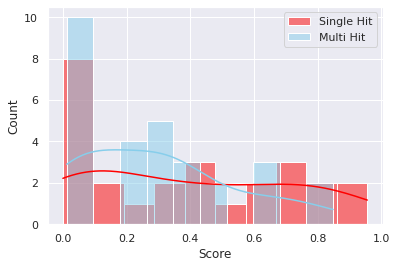

In [59]:
sns.set(style="darkgrid")

sns.histplot(single_hit_tp53_data['Score'], color="red", kde=True,label='Single Hit',bins=10)
sns.histplot(multi_hit_tp53_data['Score'], color="skyblue", kde=True,label='Multi Hit',bins=10)

plt.legend() 
plt.show()

Based on this distribution and t-test, it does not seem like these two groups have different scores for genomic stability.

#### Mutations by Patient

In [69]:
gene_counts={}

for gene in list(maf['Gene'].unique()):
    df= maf[maf['Gene']==gene]
    num_samples = df['short_name'].nunique()
    
    gene_counts[gene] = []
    gene_counts[gene].append(num_samples)
    
gene_counts = pd.DataFrame.from_dict(gene_counts).transpose()
gene_counts.rename(columns={0:'counts'},inplace=True)
gene_counts.reset_index(inplace=True)
gene_counts.rename(columns={'index':'Gene'},inplace=True)

In [74]:
viz = gene_counts[gene_counts['counts']>5]

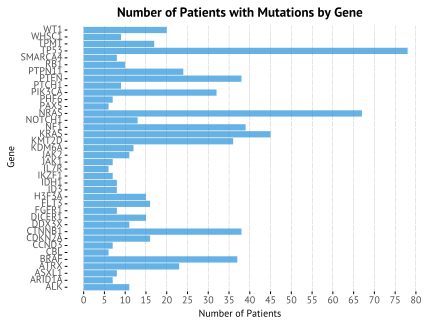

<ggplot: (8757726427624)>

In [75]:
ggplot(viz) + aes(x='Gene',y='counts') + geom_col(fill='#2591d9',alpha=0.7) + coord_flip() + \
ggtitle('Number of Patients with Mutations by Gene') + \
theme(panel_background = element_rect(fill = 'white'),panel_grid_major_x = element_line( size=.1, color="black" ),
     plot_title=element_text(fontproperties=title_text),text=element_text(fontproperties=body_text),
     legend_position = 'none') + \
labs(x='Gene',y='Number of Patients') + \
scale_y_continuous(breaks = range(0, 85,5))

In [76]:
composite_gene_counts={}

for gene in list(maf['Gene'].unique()):
    df= maf[maf['Gene']==gene][maf['Composite_Mutation']=='True']
    num_samples = df['short_name'].nunique()
    
    composite_gene_counts[gene] = []
    composite_gene_counts[gene].append(num_samples)

In [77]:
composite_gene_counts = pd.DataFrame(composite_gene_counts).transpose()
composite_gene_counts.reset_index(inplace=True)
composite_gene_counts.rename(columns={'index':'Gene',0:'Count'},inplace=True)

In [78]:
viz = composite_gene_counts[composite_gene_counts['Count']>0]

In [79]:
patients_composite = ggplot(viz) + aes(x='Gene',y='Count') + geom_col(fill='#2591d9',alpha=0.7) + \
scale_y_continuous(limits=(0,16),breaks=range(0,18,2),expand=(0,0.5)) +\
ggtitle('Number of Patients with Composite Mutations by Gene') + \
theme(panel_background = element_rect(fill = 'white'),panel_grid_major_y = element_line( size=.1, color="black" ),
     plot_title=element_text(fontproperties=title_text),text=element_text(fontproperties=body_text),
     axis_text_x = element_text(angle = 90)) + \
labs(x='Gene',y='Number of Patients')

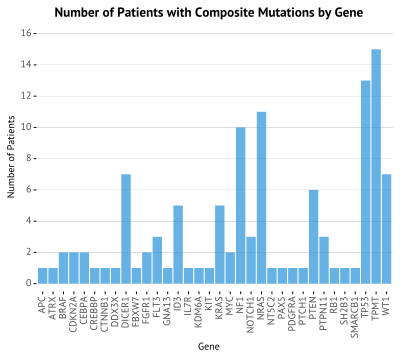

<ggplot: (8757726137613)>

In [80]:
patients_composite

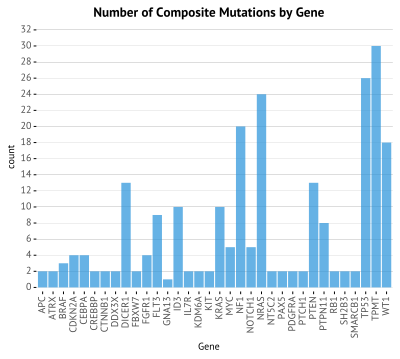

<ggplot: (8757728491060)>

In [81]:
num_comp_plot

In [97]:
o_maf['sample']

0       CPM00000165-BM-D_20200406
1        CPM00000331-F-D_20190826
2       CPM00000346-BM-D_20170801
3       CPM00000366-BM-D_20191202
4        CPM00000379-P-D_20200204
                  ...            
1361     CPM00018670-F-D_20210401
1362    CPM00018693-BM-D_20210401
1363    CPM00018693-BM-D_20210401
1364     CPM00018704-P-D_20210407
1365     CPM00018706-F-D_20210407
Name: sample, Length: 1366, dtype: object